# **STELLAR OBJECTS CLASSIFICATION**



*   Importing necessary libraries, modules and loading data



In [ ]:
# packages for data processing
import pandas as pd
import missingno as msno
#packages for modelling
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
#packages to handle imbalanced data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
#packages for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle



*   About dataset
         The data released by SDSS is under public domain.
         This dataset classifies stellar objects as galaxies, stars and quasars.
why stellar object classification is important?
          
         It is very important to astronomers to classify them, because through this we can make a separate study about them and it will help to know the pecularities of each classes.This classification is based on the spectral characteristics.Study of stellar object are vital in the study of evolution of universe.
  What are the different features used in this dataset?
       
         obj_ID --> it is the special id given to each object by CAS in the image catalogue

         alpha and delta --> alpha is the RA value and delta is the DEC value, both represents the position of the object in the space.

         u,g,r,i,z --> ultraviolet filter,green filter, red filter,near infrared filter and infrared filter in the photometric system respectively. They are used to find the temperature.

         field --> fields is the fundamental units of SDSS images. fields are divided using scanlines. fields are described using by sequence of 3 numbers
         1.run_ID --> ID for specific scan
         2.cam_col --> means the camera column to specify the scanline within the run
         3.field_ID --> ID for each field

         rerun_ID --> specify how image processed

         spec_obj_ID --> it is the ID used to specify the optical spectroscopic objects.

         class --> specifies thecclass to which the object belongs
      

          redshift --> it is the parameter used to measure the increase in wavelength.

          plate --> specify the plates in SDSS

          MJD --> Modified Julian Date.it is used to calculating elapsed days between two events

          fiber_ID --> specify the fiber that pointed the light at the focal plane in each observation

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/star_classification.csv')
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),



*   statistics of each features



In [ ]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000




*checking missing values



In [ ]:
df.isna().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64



* checking the type of each features and also the shape of the dataset



In [ ]:
df.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

In [ ]:
df.shape

(100000, 18)



*  checking whether it's an imbalanced dataset



In [ ]:
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64



*   since class is belongs to object datatype changing it to numeric data



In [ ]:
le=LabelEncoder()
df['class']=le.fit_transform(df['class'])

In [ ]:
df1=df.copy()
df1

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,0,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,0,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,0,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,0,0.455040,6751,56368,470




*   remove the columns that are not relevant to the prediction



In [ ]:
features=['obj_ID','run_ID','rerun_ID','cam_col','field_ID','spec_obj_ID','class','plate','MJD','fiber_ID']
for i in features:
  df1.drop([i],axis=1,inplace=True)

Exploratory data analysis (EDA)


<Axes: >

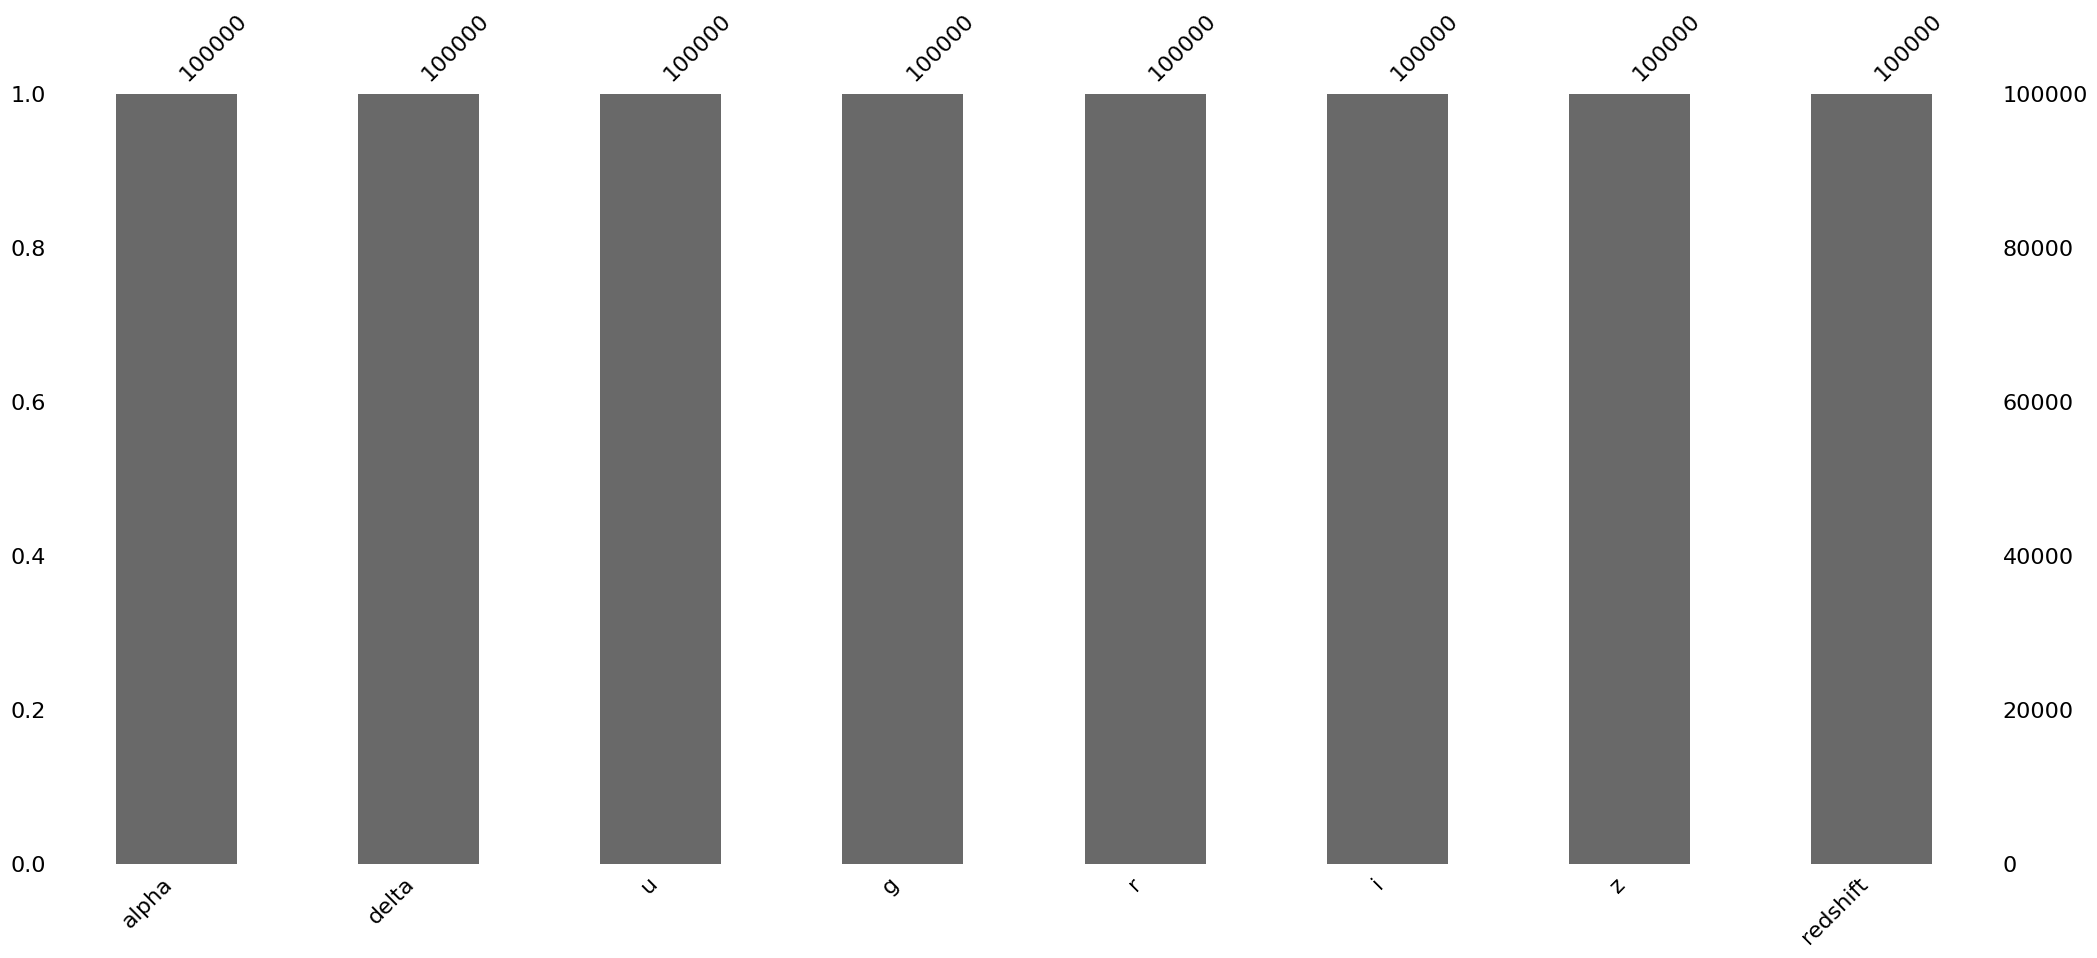

In [ ]:
# shows that there is no missing values
msno.bar(df1)

In [ ]:
#checking the correlation --> it is the dependency between two variables. it shows the measure of changing of one variable with respect to other
df1.corr()

,alpha,delta,u,g,r,i,z,redshift
alpha,1.000000,0.138691,-0.001532,-0.002423,-0.022083,-0.023580,-0.002918,0.001667
delta,0.138691,1.000000,0.002074,0.003523,-0.006835,-0.004480,0.003630,0.031638
u,-0.001532,0.002074,1.000000,0.999311,0.054149,0.045730,0.998093,0.014309
g,-0.002423,0.003523,0.999311,1.000000,0.062387,0.056271,0.999161,0.022954
r,-0.022083,-0.006835,0.054149,0.062387,1.000000,0.962868,0.053677,0.433241
i,-0.023580,-0.004480,0.045730,0.056271,0.962868,1.000000,0.055994,0.492383
z,-0.002918,0.003630,0.998093,0.999161,0.053677,0.055994,1.000000,0.030380
redshift,0.001667,0.031638,0.014309,0.022954,0.433241,0.492383,0.030380,1.000000


<Axes: >

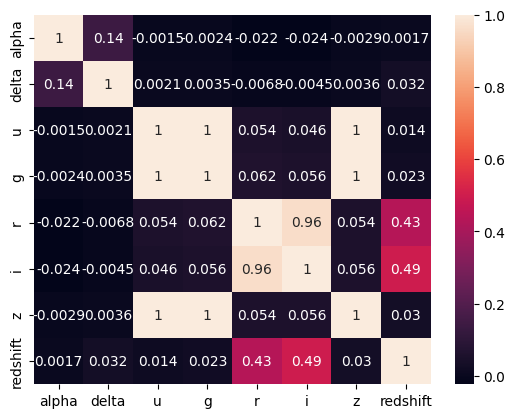

In [ ]:
#Heat map -->visual representation of correlation
sns.heatmap(df1.corr(),annot=True)

Text(0.5, 1.0, 'percentage of each class in the given data set')

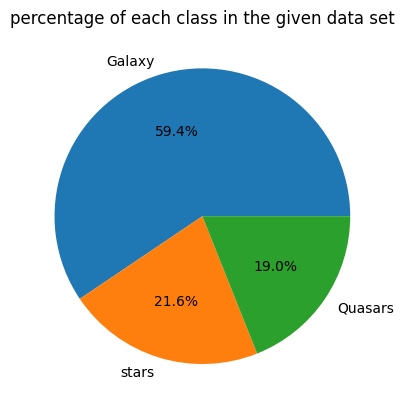

In [ ]:
data=df['class'].value_counts()
label=['Galaxy','stars','Quasars']
plt.pie(data,labels=label,autopct='%1.1f%%')
plt.title('percentage of each class in the given data set')

train test splitting of data

In [ ]:
X=df1.iloc[:5000,:]
X

,alpha,delta,u,g,r,i,z,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123
...,...,...,...,...,...,...,...,...
4995,123.356181,43.309060,20.40624,20.44815,20.19053,20.16239,20.16192,0.973830
4996,112.458217,41.174503,17.30745,16.16104,15.99554,15.96713,15.98542,0.000027
4997,340.931836,28.677296,23.19604,23.00480,20.65484,19.57330,19.25694,0.525836
4998,30.758153,-1.169086,19.55910,18.51028,17.85034,17.46817,17.27019,0.181500


In [ ]:
y=df['class'].iloc[:5000]
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    1
4996    2
4997    0
4998    0
4999    0
Name: class, Length: 5000, dtype: int64

In [ ]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=1,test_size=0.3)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3500, 8), (1500, 8), (3500,), (1500,))

Modelling

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Accuracy score : 0.8786666666666667
              precision    recall  f1-score   support

           0       0.86      0.96      0.90       887
           1       0.96      0.89      0.93       292
           2       0.87      0.65      0.75       321

    accuracy                           0.88      1500
   macro avg       0.90      0.83      0.86      1500
weighted avg       0.88      0.88      0.87      1500



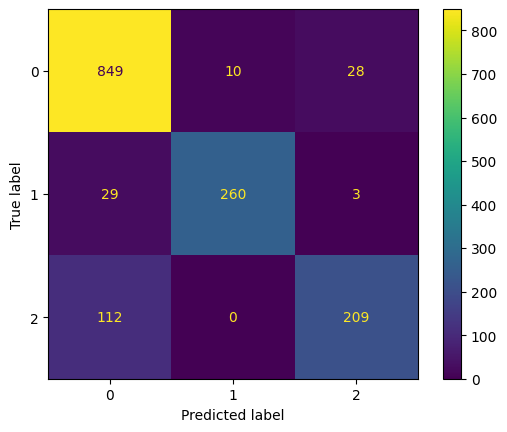

In [ ]:
y_pred_knn=knn.predict(X_test)
print("Accuracy score :",accuracy_score(y_test,y_pred_knn))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))

In [ ]:
params={'n_neighbors':[3,5,7,9],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}
clf=GridSearchCV(knn,params,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)
print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}


knn with hyperparametertuning

Accuracy score : 0.8753333333333333
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       887
           1       0.97      0.88      0.92       292
           2       0.86      0.64      0.74       321

    accuracy                           0.88      1500
   macro avg       0.89      0.83      0.85      1500
weighted avg       0.88      0.88      0.87      1500



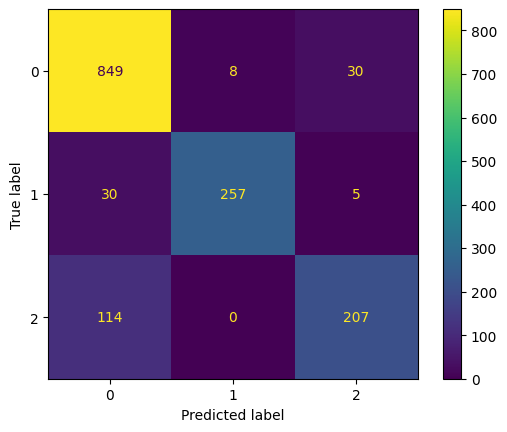

In [ ]:
knn1=KNeighborsClassifier(n_neighbors=7,weights='distance',algorithm='auto')
knn1.fit(X_train,y_train)
y_pred_knn1=knn1.predict(X_test)
print('Accuracy score :',accuracy_score(y_test,y_pred_knn1))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn1))
print(classification_report(y_test,y_pred_knn1))

supportvectorclassifier

In [ ]:
svc=SVC(random_state=1)
svc.fit(X_train,y_train)

SVC(random_state=1)

Accuracy score : 0.902
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       887
           1       0.97      0.86      0.91       292
           2       0.90      0.77      0.83       321

    accuracy                           0.90      1500
   macro avg       0.92      0.87      0.89      1500
weighted avg       0.90      0.90      0.90      1500



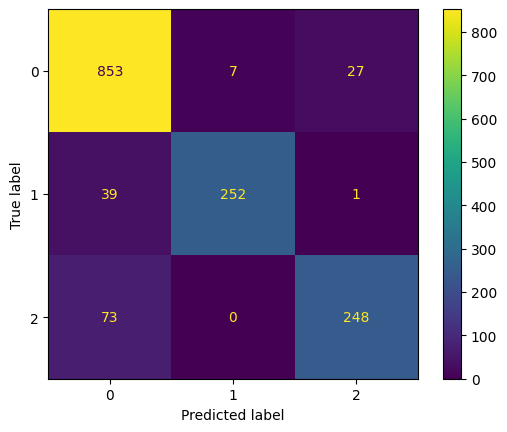

In [ ]:
y_pred_svc=svc.predict(X_test)
print('Accuracy score :',accuracy_score(y_test,y_pred_svc))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))

In [ ]:
paramssvc={'kernel':['linear','poly','rbf','sigmoid'],'gamma':['scale','auto']}
clfsvc=GridSearchCV(svc,paramssvc,cv=10,scoring='accuracy')
clfsvc.fit(X_train,y_train)
print(clfsvc.best_params_)

{'gamma': 'scale', 'kernel': 'poly'}


svc with hyperparameter tuning

In [ ]:
svc1=SVC(random_state=1,gamma='scale',kernel='rbf')
svc1.fit(X_train,y_train)

SVC(random_state=1)

Accuracy score : 0.902
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       887
           1       0.97      0.86      0.91       292
           2       0.90      0.77      0.83       321

    accuracy                           0.90      1500
   macro avg       0.92      0.87      0.89      1500
weighted avg       0.90      0.90      0.90      1500



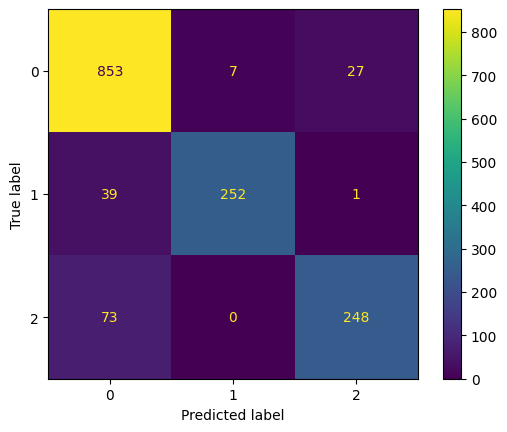

In [ ]:
y_pred_svc1=svc.predict(X_test)
print('Accuracy score :',accuracy_score(y_test,y_pred_svc1))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_svc1))
print(classification_report(y_test,y_pred_svc1))

naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

Accuracy score : 0.9273333333333333
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       887
           1       0.79      0.90      0.84       292
           2       0.98      0.99      0.98       321

    accuracy                           0.93      1500
   macro avg       0.91      0.94      0.92      1500
weighted avg       0.93      0.93      0.93      1500



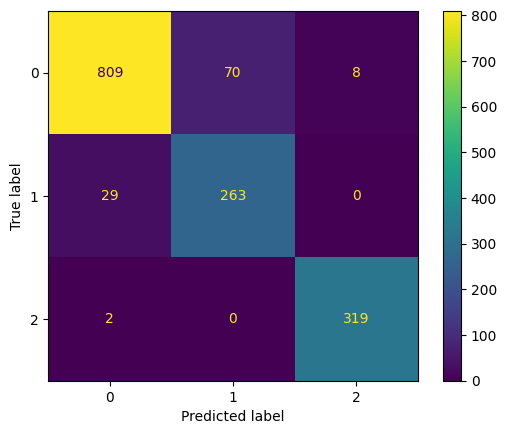

In [ ]:
y_pred_nb=nb.predict(X_test)
print('Accuracy score :',accuracy_score(y_test,y_pred_nb))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_nb))
print(classification_report(y_test,y_pred_nb))

decision tree classifier

In [ ]:
dtc=DecisionTreeClassifier(random_state=1)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

Accuracy score : 0.9453333333333334
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       887
           1       0.87      0.89      0.88       292
           2       0.98      0.98      0.98       321

    accuracy                           0.95      1500
   macro avg       0.94      0.94      0.94      1500
weighted avg       0.95      0.95      0.95      1500



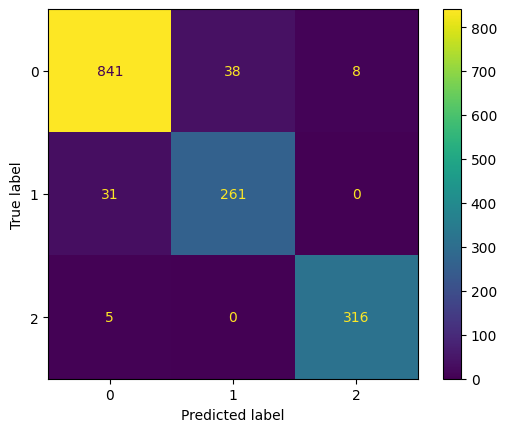

In [ ]:
y_pred_dtc=dtc.predict(X_test)
print('Accuracy score :',accuracy_score(y_test,y_pred_dtc))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dtc))
print(classification_report(y_test,y_pred_dtc))

decision tree with hypertuning

In [ ]:
paramsdtc={'criterion':['gini','entropy','log_loss'],'splitter':['best','random'],'max_depth':[3,4,5,6,7],'min_samples_split':[2,3]}
clfdtc=GridSearchCV(dtc,paramsdtc,cv=10,scoring='accuracy')
clfdtc.fit(X_train,y_train)
print(clfdtc.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 3, 'splitter': 'best'}


In [ ]:
dtc1=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=4,min_samples_split=2,splitter='best')
dtc1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)

Accuracy score : 0.9633333333333334
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       887
           1       0.97      0.87      0.92       292
           2       0.98      0.99      0.99       321

    accuracy                           0.96      1500
   macro avg       0.97      0.95      0.96      1500
weighted avg       0.96      0.96      0.96      1500



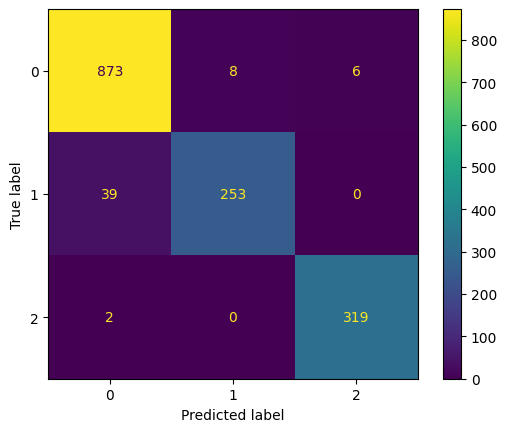

In [ ]:
y_pred_dtc1=dtc1.predict(X_test)
print('Accuracy score :',accuracy_score(y_test,y_pred_dtc1))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dtc1))
print(classification_report(y_test,y_pred_dtc1))

random forest classifier

In [ ]:
rfc=RandomForestClassifier(random_state=1)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

Accuracy score : 0.9693333333333334
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       887
           1       0.97      0.91      0.94       292
           2       0.96      1.00      0.98       321

    accuracy                           0.97      1500
   macro avg       0.97      0.96      0.97      1500
weighted avg       0.97      0.97      0.97      1500



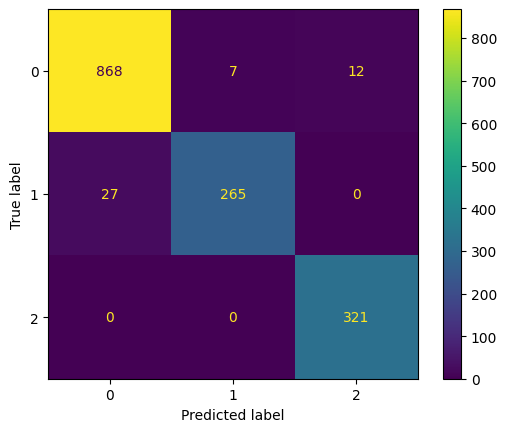

In [ ]:
y_pred_rfc=rfc.predict(X_test)
print('Accuracy score :',accuracy_score(y_test,y_pred_rfc))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rfc))
print(classification_report(y_test,y_pred_rfc))

randomforestclassifier with hypertuning

In [ ]:
paramsrfc={'n_estimators':[100,150,200],'criterion':['gini','entropy','log_loss'],'max_depth':[3,5,7,9]}
clfrfc=GridSearchCV(rfc,paramsrfc,cv=10,scoring='accuracy')
clfrfc.fit(X_train,y_train)
print(clfrfc.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 100}


Accuracy score : 0.9673333333333334
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       887
           1       0.97      0.90      0.93       292
           2       0.96      1.00      0.98       321

    accuracy                           0.97      1500
   macro avg       0.97      0.96      0.96      1500
weighted avg       0.97      0.97      0.97      1500



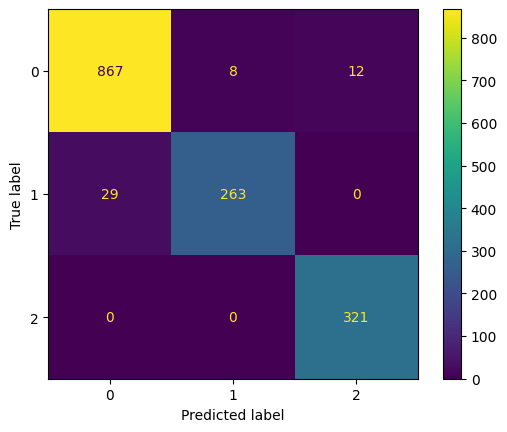

In [ ]:
rfc1=RandomForestClassifier(random_state=1,criterion='gini',max_depth=9,n_estimators=200)
rfc1.fit(X_train,y_train)
y_pred_rfc1=rfc1.predict(X_test)
print('Accuracy score :',accuracy_score(y_test,y_pred_rfc1))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rfc1))
print(classification_report(y_test,y_pred_rfc1))

adaboost

In [ ]:
abc=AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

Accuracy score : 0.9393333333333334
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       887
           1       0.90      0.83      0.86       292
           2       0.96      1.00      0.98       321

    accuracy                           0.94      1500
   macro avg       0.93      0.93      0.93      1500
weighted avg       0.94      0.94      0.94      1500



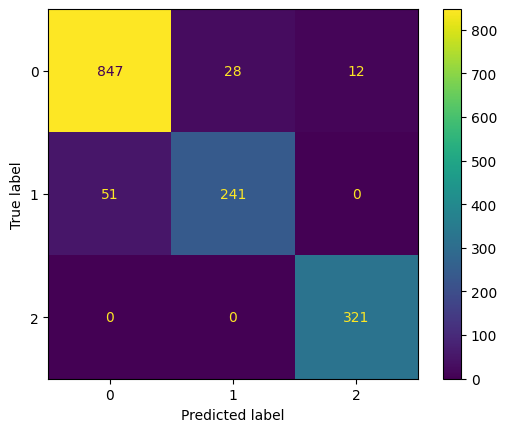

In [ ]:
y_pred_abc=abc.predict(X_test)
print('Accuracy score :',accuracy_score(y_test,y_pred_abc))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_abc))
print(classification_report(y_test,y_pred_abc))

adaboost with hypertuning

In [ ]:
paramsabc={'n_estimators':[50,100,150],'learning_rate':[1.0,2.0,3.0],'algorithm':['SAMME','SAMME.R']}
clfabc=GridSearchCV(abc,paramsabc,cv=10,scoring='accuracy')
clfabc.fit(X_train,y_train)
print(clfabc.best_params_)

{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 50}


Accuracy score : 0.9266666666666666
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       887
           1       0.82      0.85      0.83       292
           2       0.96      1.00      0.98       321

    accuracy                           0.93      1500
   macro avg       0.91      0.92      0.92      1500
weighted avg       0.93      0.93      0.93      1500



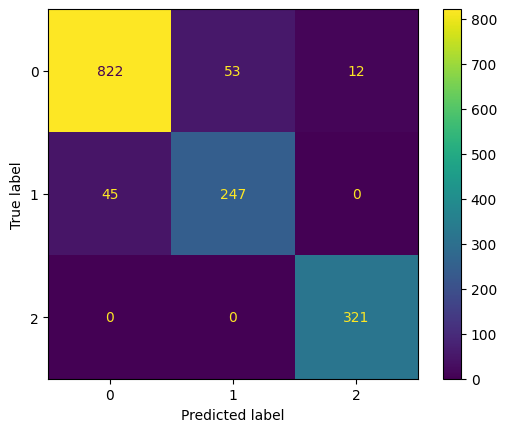

In [ ]:
abc1=AdaBoostClassifier(random_state=1,algorithm='SAMME',learning_rate=1.0,n_estimators=100)
abc1.fit(X_train,y_train)
y_pred_abc1=abc1.predict(X_test)
print('Accuracy score :',accuracy_score(y_test,y_pred_abc1))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_abc1))
print(classification_report(y_test,y_pred_abc1))

Xgbc

In [ ]:
xbgc=XGBClassifier(random_state=1)
xbgc.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Accuracy score : 0.972
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       887
           1       0.96      0.92      0.94       292
           2       0.98      0.99      0.99       321

    accuracy                           0.97      1500
   macro avg       0.97      0.96      0.97      1500
weighted avg       0.97      0.97      0.97      1500



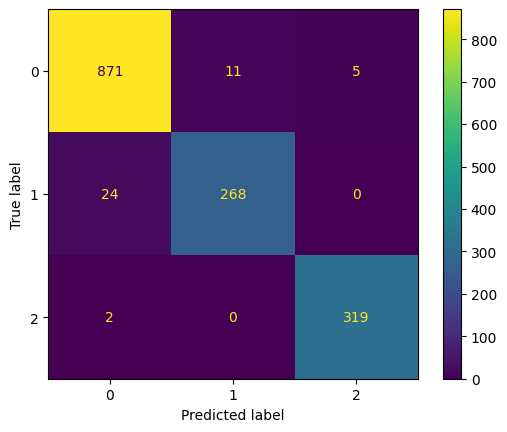

In [ ]:
y_pred_xbgc=xbgc.predict(X_test)
print('Accuracy score :',accuracy_score(y_test,y_pred_xbgc))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_xbgc))
print(classification_report(y_test,y_pred_xbgc))

In [ ]:
paramxbgc={'n_estimators':[200,300,400],'max_depth':[2,3,4],'learning_rate':[1,2]}
clfxbgc=GridSearchCV(xbgc,paramxbgc,cv=10,scoring='accuracy')
clfxbgc.fit(X_train,y_train)
print(clfxbgc.best_params_)

{'learning_rate': 1, 'max_depth': 4, 'n_estimators': 200}


Accuracy score : 0.9706666666666667
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       887
           1       0.96      0.91      0.93       292
           2       0.98      1.00      0.99       321

    accuracy                           0.97      1500
   macro avg       0.97      0.96      0.97      1500
weighted avg       0.97      0.97      0.97      1500



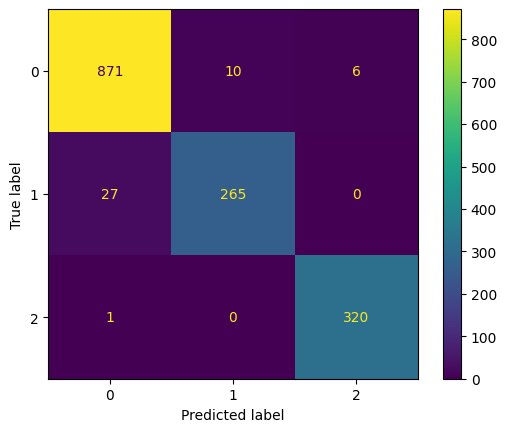

In [ ]:
xbgc1=XGBClassifier(random_state=1,learning_rate=1,max_depth=3,n_estimators=200)
xbgc1.fit(X_train,y_train)
y_pred_xbgc1=xbgc1.predict(X_test)
print('Accuracy score :',accuracy_score(y_test,y_pred_xbgc1))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_xbgc1))
print(classification_report(y_test,y_pred_xbgc1))

In [ ]:
y.value_counts()

0    2963
1    1028
2    1009
Name: class, dtype: int64

oversampling


In [ ]:
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X,y)
scaler=MinMaxScaler()
X_os_scaled=scaler.fit_transform(X_os)
X_os_scaled

array([[3.76931535e-01, 4.80841662e-01, 6.85876335e-01, ...,
        5.83320912e-01, 5.67125117e-01, 9.10882986e-02],
       [4.02314276e-01, 4.68117139e-01, 7.38943035e-01, ...,
        7.31809435e-01, 7.53816654e-01, 1.11666312e-01],
       [3.94987777e-01, 5.13035555e-01, 7.67607567e-01, ...,
        5.96879530e-01, 5.77355371e-01, 9.24285275e-02],
       ...,
       [5.41452676e-01, 1.15968625e-01, 5.34793011e-01, ...,
        6.62975282e-01, 6.53329624e-01, 6.08949120e-04],
       [7.03639096e-01, 3.53978239e-01, 4.98077376e-01, ...,
        3.75352039e-01, 3.65554163e-01, 5.88081391e-04],
       [5.05446833e-01, 5.11489035e-01, 5.85183355e-01, ...,
        6.71574474e-01, 6.27617060e-01, 4.84791796e-04]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_os_scaled,y_os,random_state=1,test_size=0.3)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((6222, 8), (6222,), (2667, 8), (2667,))

KNeighborsClassifier()
Accuracy score : 0.9253843269591301
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       899
           1       0.98      0.94      0.96       867
           2       0.92      0.91      0.92       901

    accuracy                           0.93      2667
   macro avg       0.93      0.93      0.93      2667
weighted avg       0.93      0.93      0.93      2667

SVC()
Accuracy score : 0.9332583427071616
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       899
           1       0.99      0.94      0.97       867
           2       0.91      0.96      0.93       901

    accuracy                           0.93      2667
   macro avg       0.94      0.93      0.93      2667
weighted avg       0.93      0.93      0.93      2667

GaussianNB()
Accuracy score : 0.9388826396700413
              precision    recall  f1-score   support

           0       0.93      0.89

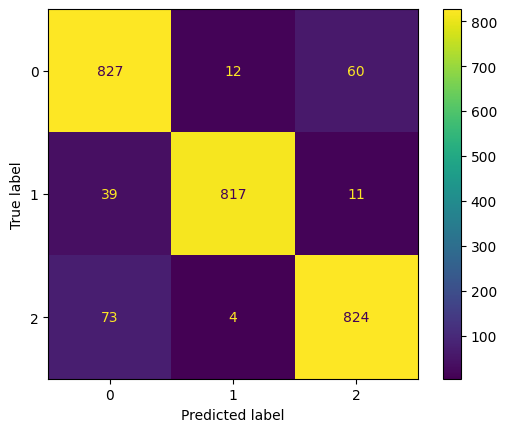

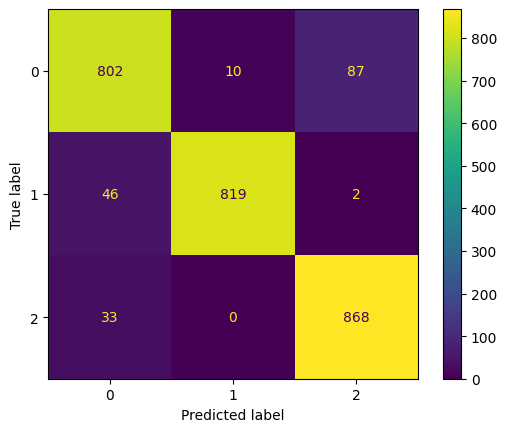

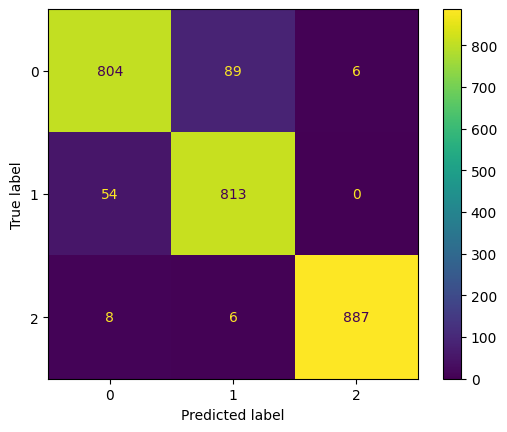

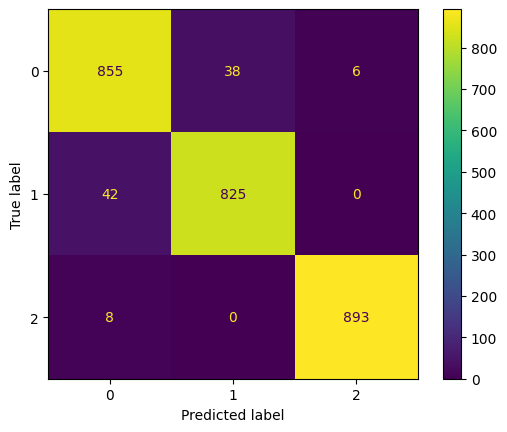

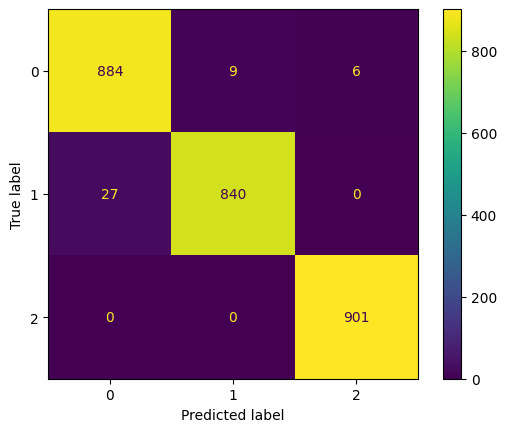

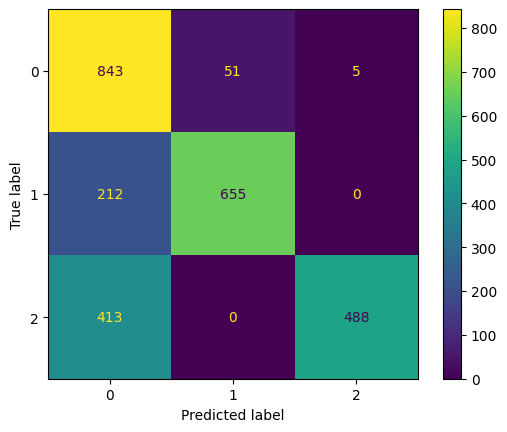

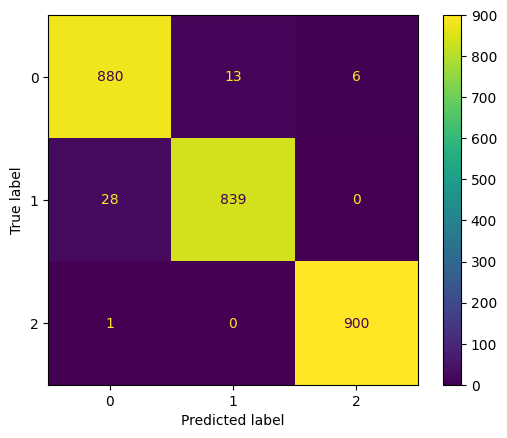

In [ ]:
knn2=KNeighborsClassifier()
sv2=SVC()
nb2=GaussianNB()
dtc2=DecisionTreeClassifier()
rfc2=RandomForestClassifier()
abc2=AdaBoostClassifier()
xbgc2=XGBClassifier()
models=[knn2,sv2,nb2,dtc2,rfc2,abc2,xbgc2]
for model in models:
  print(model)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print('Accuracy score :',accuracy_score(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
  print(classification_report(y_test,y_pred))

undersampling

In [ ]:
us=RandomUnderSampler(random_state=1)
X_us,y_us=us.fit_resample(X,y)
scaler=MinMaxScaler()
X_us_scaled=scaler.fit_transform(X_us)
X_us_scaled

array([[3.60513212e-01, 4.43847524e-01, 8.56234512e-01, ...,
        5.39719861e-01, 5.43292916e-01, 6.14866182e-02],
       [8.90318465e-01, 1.51534983e-01, 6.80051085e-01, ...,
        6.11998701e-01, 5.96811783e-01, 7.36799792e-02],
       [3.54600676e-02, 2.99984090e-01, 6.54852417e-01, ...,
        6.34524698e-01, 6.09512891e-01, 1.05426633e-01],
       ...,
       [6.55688812e-01, 1.89118303e-01, 4.63498303e-01, ...,
        5.71343450e-01, 5.95382751e-01, 5.98864525e-04],
       [5.06979962e-01, 5.00278752e-01, 5.48393096e-01, ...,
        7.00704962e-01, 6.69180766e-01, 5.95960503e-04],
       [3.12380771e-01, 5.71339019e-01, 2.97878383e-01, ...,
        3.08167642e-01, 3.81245727e-01, 5.93455159e-04]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_os_scaled,y_os,random_state=1,test_size=0.3)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((6222, 8), (6222,), (2667, 8), (2667,))

KNeighborsClassifier()
Accuracy score : 0.9253843269591301
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       899
           1       0.98      0.94      0.96       867
           2       0.92      0.91      0.92       901

    accuracy                           0.93      2667
   macro avg       0.93      0.93      0.93      2667
weighted avg       0.93      0.93      0.93      2667

SVC()
Accuracy score : 0.9332583427071616
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       899
           1       0.99      0.94      0.97       867
           2       0.91      0.96      0.93       901

    accuracy                           0.93      2667
   macro avg       0.94      0.93      0.93      2667
weighted avg       0.93      0.93      0.93      2667

GaussianNB()
Accuracy score : 0.9388826396700413
              precision    recall  f1-score   support

           0       0.93      0.89

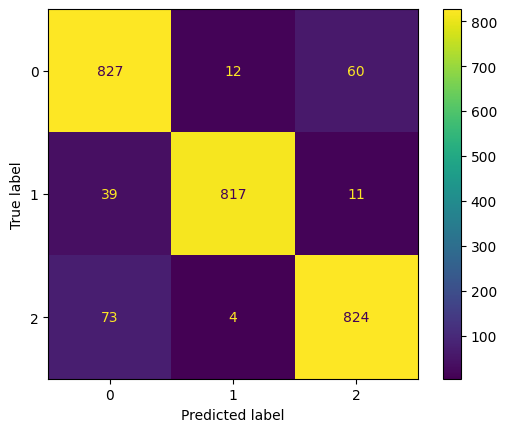

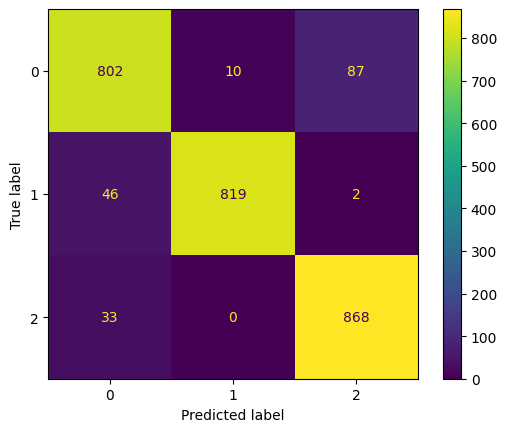

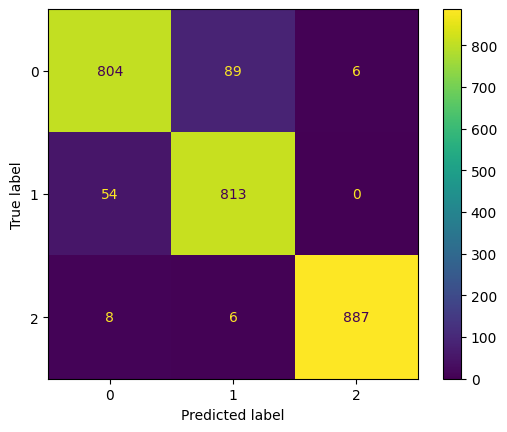

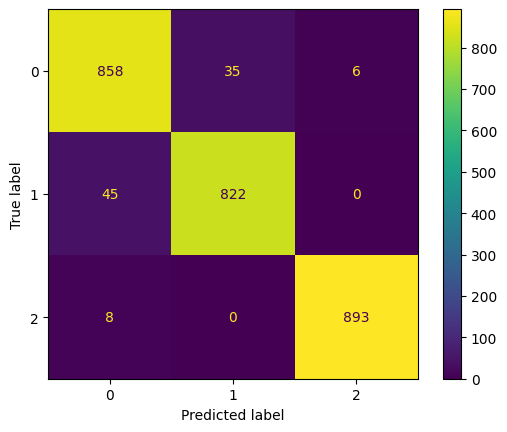

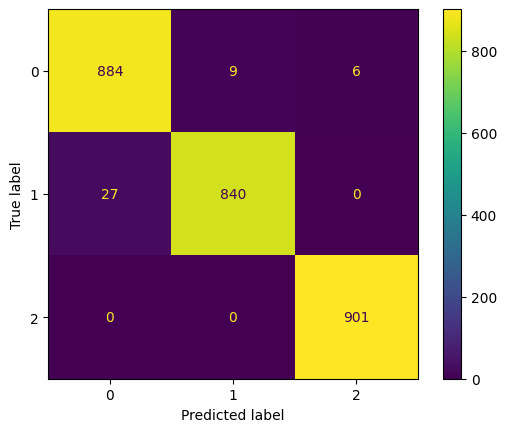

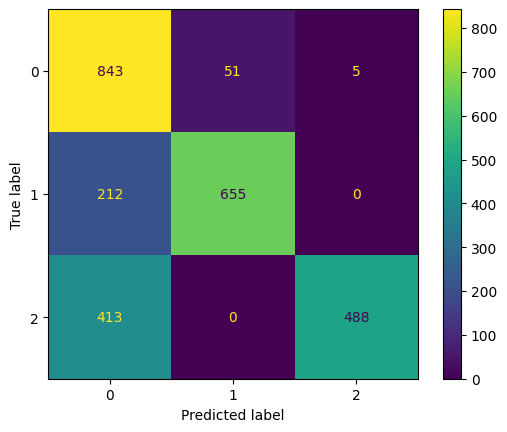

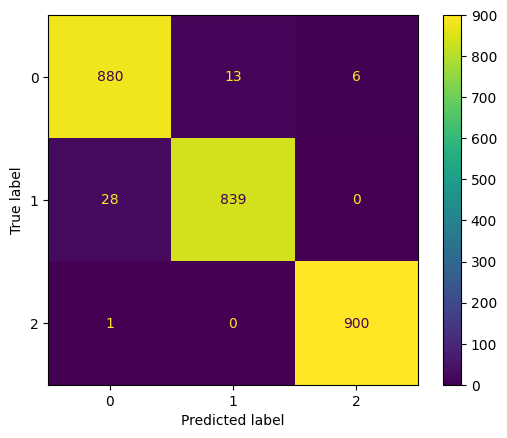

In [ ]:
knn3=KNeighborsClassifier()
sv3=SVC()
nb3=GaussianNB()
dtc3=DecisionTreeClassifier()
rfc3=RandomForestClassifier()
abc3=AdaBoostClassifier()
xbgc3=XGBClassifier()
models=[knn3,sv3,nb3,dtc3,rfc3,abc3,xbgc3]
for model in models:
  print(model)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print('Accuracy score :',accuracy_score(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
  print(classification_report(y_test,y_pred))

Best fitting model - Randomforest classifier with undersampling

Accuracy score : 0.9820022497187851
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       899
           1       0.98      0.97      0.98       867
           2       0.99      1.00      1.00       901

    accuracy                           0.98      2667
   macro avg       0.98      0.98      0.98      2667
weighted avg       0.98      0.98      0.98      2667



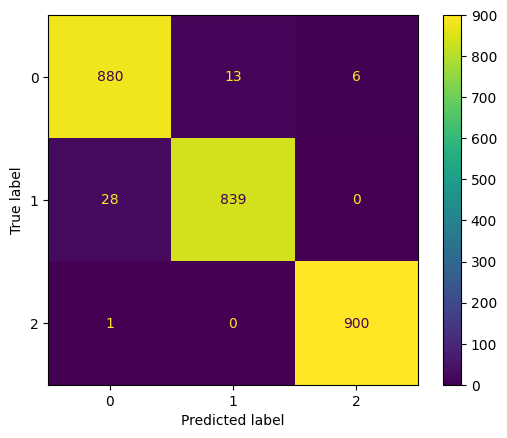

In [ ]:
us=RandomUnderSampler(random_state=1)
X_us,y_us=us.fit_resample(X,y)
scaler=MinMaxScaler()
X_us_scaled=scaler.fit_transform(X_us)
X_us_scaled
X_train,X_test,y_train,y_test=train_test_split(X_os_scaled,y_os,random_state=1,test_size=0.3)
X_train.shape,y_train.shape,X_test.shape,y_test.shape
rfc3=RandomForestClassifier()
rfc3.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Accuracy score :',accuracy_score(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))

saving the best model

In [ ]:
filename='model1.sav'
pickle.dump(rfc3,open(filename,'wb'))

In [ ]:
pickle.dump(scaler,open('scaler.sav','wb'))